In [81]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from typing import Callable
from skimage.color import rgb2hsv

OG dimensions:  (4000, 6000, 3)
reduced dimensions:  (1000, 1500, 3)


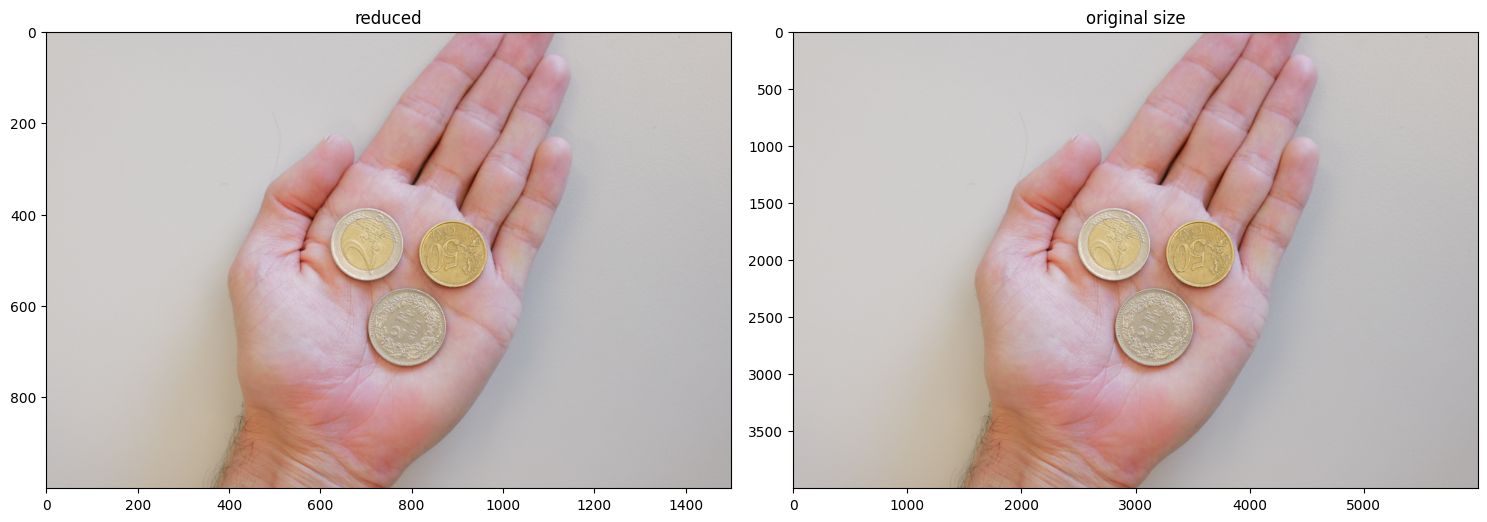

In [82]:
# Define path
path_he = os.path.join("dataset", "train", "hand", "L1010373.JPG")

# Check if folder and image exist
assert os.path.exists(path_he), "Image not found, please check directory structure"

# Load image
image_og= np.array(Image.open(path_he))
scale_percent = 25
width = int(image_og.shape[1] * scale_percent / 100)
height = int(image_og.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv2.resize(image_og, dim, interpolation=cv2.INTER_AREA)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("reduced")
plt.subplot(1,2,2)
plt.title("original size")
plt.imshow(image_og)

# plt.axis('off')
plt.tight_layout()
print("OG dimensions: ", image_og.shape)
print("reduced dimensions: ", image.shape)


In [83]:
def extract_rgb_channels(img):
    """
    Extract RGB channels from the input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    data_red: np.ndarray (M, N)
        Red channel of input image
    data_green: np.ndarray (M, N)
        Green channel of input image
    data_blue: np.ndarray (M, N)
        Blue channel of input image
    """

    # Get the shape of the input image
    M, N, C = np.shape(img)

    # Define default values for RGB channels
    data_red = np.zeros((M, N))
    data_green = np.zeros((M, N))
    data_blue = np.zeros((M, N))

    # ------------------
    data_red = img[:,:,0]
    data_green = img[:,:,1]
    data_blue = img[:,:,2]
    # ------------------
    
    return data_red, data_green, data_blue

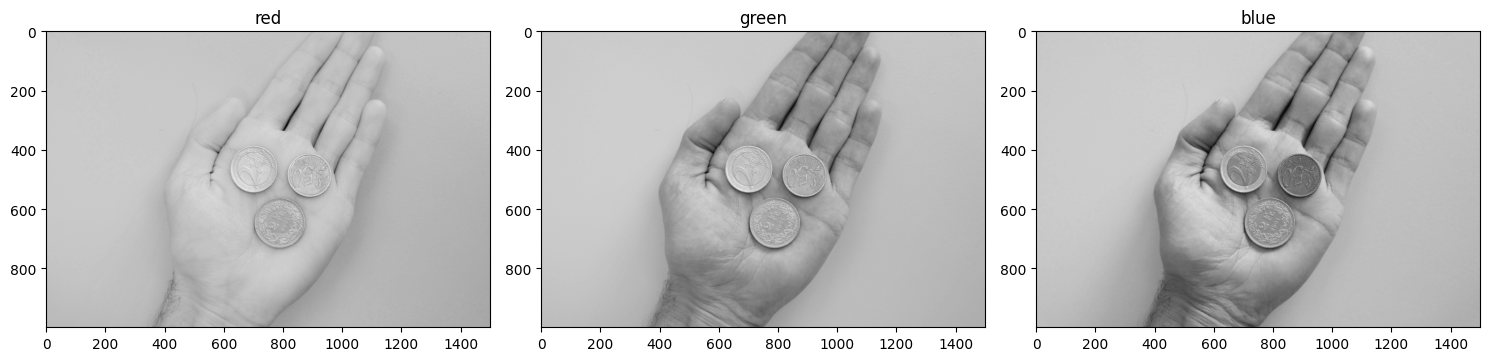

In [84]:
[data_red,data_green,data_blue] = extract_rgb_channels(image)

# Create subplots
plt.figure(figsize=(15, 5))

# Plot the first image
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot 1
plt.imshow(data_red, cmap='gray')
plt.title('red')

# Plot the second image
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot 2
plt.imshow(data_green, cmap='gray')
plt.title('green')

# Plot the third image
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot 3
plt.imshow(data_blue, cmap='gray')
plt.title('blue')

plt.tight_layout()

In [85]:
def apply_rgb_threshold(img):
    """
    Apply threshold to RGB input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    img_th: np.ndarray (M, N)
        Thresholded image.
    """

    # Define the default value for the input image
    M, N, C = np.shape(img)
    img_th = np.zeros((M, N))

    # Use the previous function to extract RGB channels
    # data_red, data_green, data_blue = extract_rgb_channels(img=img)
    
    # ------------------
    thr_red = 180      #   Threshold on red
    thr_green = 150      #   Threshold on green
    thr_blue = 110      #   Threshold on blue
    
    mask_red = img[:,:,0] > thr_red     #   Mask computed on red channel
    mask_green = img[:,:,1] > thr_green     #   Mask computed on red channel
    mask_blue = img[:,:,2] > thr_blue       #   Mask computed on red channel

    # img_th = img_red*img_green*img_blue     #   Combine masks for all channels
    img_th = np.logical_not(mask_red*mask_green*mask_blue)
    # ------------------

    return  img_th

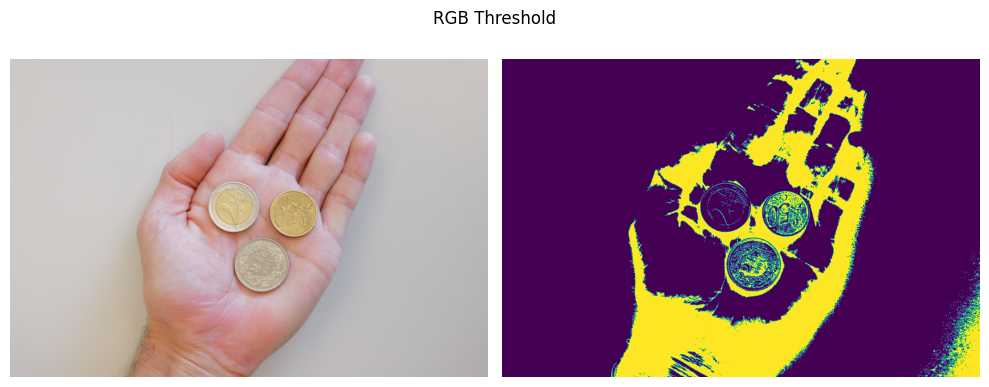

In [86]:
# Plot color space distribution 
def plot_thresholded_image(
    img: np.ndarray,
    func: Callable,
    title: str,
):
    """
    Plot the original image and its thresholded version

    Args
    ----
    img: np.ndarray (M, N, 3)
        Input image of shape MxNx3.
    func: Callable
        Thresholded image.
    title: str
        Title of the plot
    """

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(img)
    axes[1].imshow(func(img))
    [a.axis('off') for a in axes]
    plt.suptitle(title)
    plt.tight_layout()
    
# Plot best RGB thresholding
plot_thresholded_image(img=image, func=apply_rgb_threshold, title="RGB Threshold")

In [87]:
def extract_hsv_channels(img):
    """
    Extract HSV channels from the input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    data_h: np.ndarray (M, N)
        Hue channel of input image
    data_s: np.ndarray (M, N)
        Saturation channel of input image
    data_v: np.ndarray (M, N)
        Value channel of input image
    """

    # Get the shape of the input image
    M, N, C = np.shape(img)

    # Define default values for HSV channels
    data_h = np.zeros((M, N))
    data_s = np.zeros((M, N))
    data_v = np.zeros((M, N))

    # ------------------
    hsv_img = rgb2hsv(img)
    data_h = hsv_img[:,:,0]
    data_s = hsv_img[:,:,1]
    data_v = hsv_img[:,:,2]
    # ------------------
    
    return data_h, data_s, data_v

Text(0.5, 1.0, 'value')

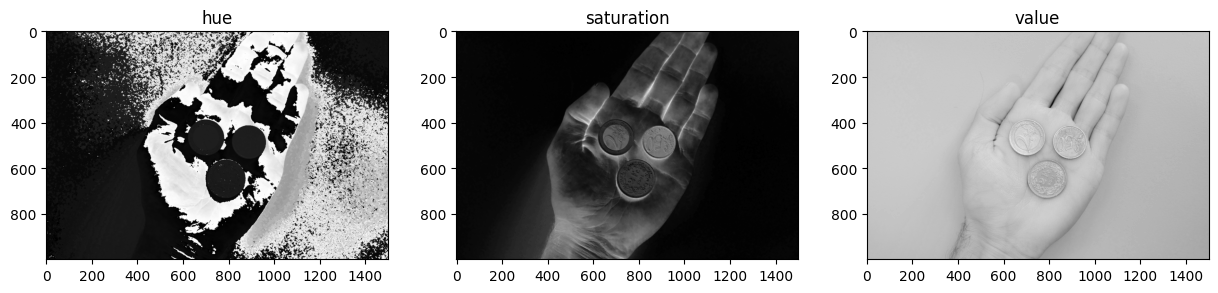

In [88]:
[data_h,data_s,data_v] = extract_hsv_channels(image)

# Create subplots
plt.figure(figsize=(15, 5))

# Plot the first image
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot 1
plt.imshow(data_h, cmap='gray')
plt.title('hue')

# Plot the second image
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot 2
plt.imshow(data_s, cmap='gray')
plt.title('saturation')

# Plot the third image
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot 3
plt.imshow(data_v, cmap='gray')
plt.title('value')


In [89]:
def extract_LAB_channels(img):
    """
    Extract HSV channels from the input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    data_h: np.ndarray (M, N)
        Hue channel of input image
    data_s: np.ndarray (M, N)
        Saturation channel of input image
    data_v: np.ndarray (M, N)
        Value channel of input image
    """

    # Get the shape of the input image
    M, N, C = np.shape(img)

    # Define default values for HSV channels
    data_h = np.zeros((M, N))
    data_s = np.zeros((M, N))
    data_v = np.zeros((M, N))

    # ------------------
    LAB_img = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    L = LAB_img[:,:,0]
    A = LAB_img[:,:,1]
    B = LAB_img[:,:,2]
    # ------------------
    
    return L, A, B

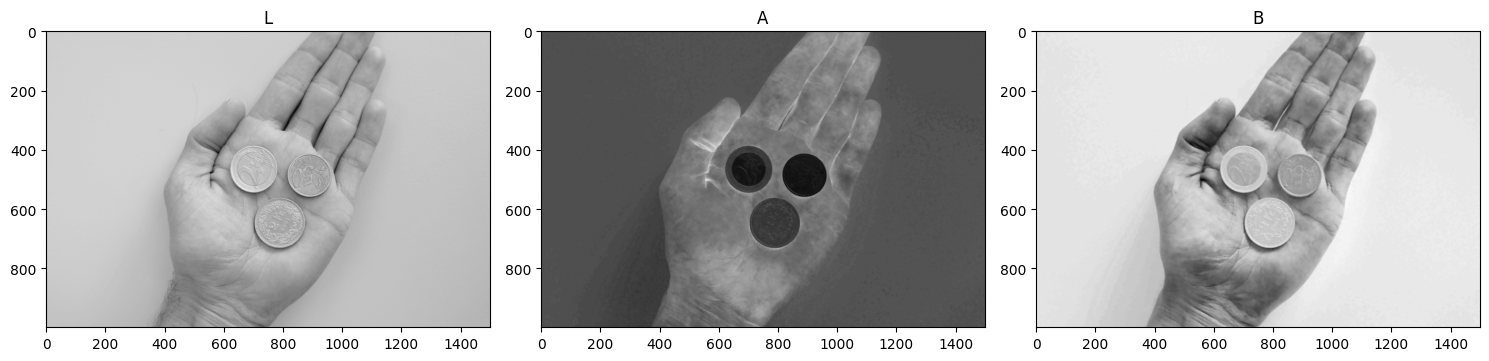

In [90]:
[data_red,data_green,data_blue] = extract_LAB_channels(image)

# Create subplots
plt.figure(figsize=(15, 5))

# Plot the first image
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot 1
plt.imshow(data_red, cmap='gray')
plt.title('L')

# Plot the second image
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot 2
plt.imshow(data_green, cmap='gray')
plt.title('A')

# Plot the third image
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot 3
plt.imshow(data_blue, cmap='gray')
plt.title('B')

plt.tight_layout()

In [91]:
def apply_LAB_threshold(img):
    """
    Apply threshold to the input image in hsv colorspace.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    img_th: np.ndarray (M, N)
        Thresholded image.
    """

    # Define the default value for the input image
    M, N, C = np.shape(img)
    img_th = np.zeros((M, N))

    # Use the previous function to extract HSV channels
        
    # ------------------

    LAB_img = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    thr_L = 100      #   Threshold on red
    thr_A = 122      #   Threshold on green
    thr_B = 100      #   Threshold on blue
    
    # mask_L = LAB_img[:,:,0] > thr_L     #   Mask computed on red channel
    mask_A = LAB_img[:,:,1] > thr_A     #   Mask computed on red channel
    # mask_B = LAB_img[:,:,2] > thr_B       #   Mask computed on red channel

    # img_th = img_red*img_green*img_blue     #   Combine masks for all channels
    # img_th = (mask_red*mask_green*mask_blue)
    img_th = mask_A
    
    # ------------------
    return  img_th


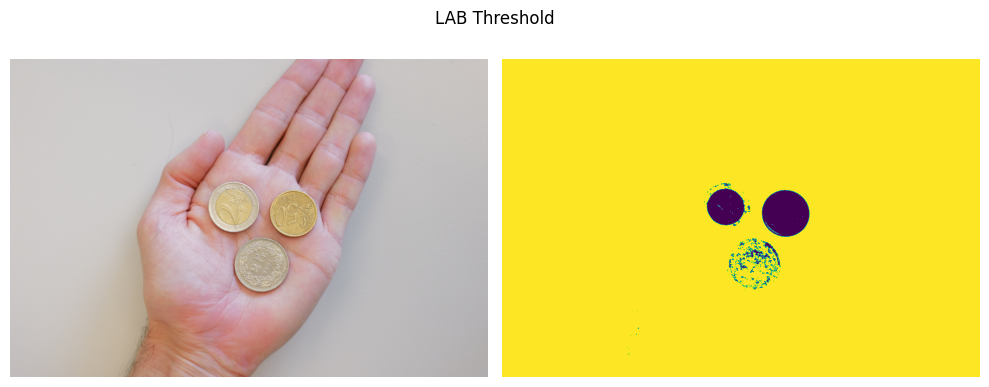

In [92]:
plot_thresholded_image(img=image, func=apply_LAB_threshold, title="LAB Threshold")